In [13]:
from matplotlib import pyplot as plt
from sklearn import linear_model
#plt.style.use('classic')
from matplotlib import style
style.use('seaborn-whitegrid')
import pandas as pd 
import numpy as np

In [14]:
data = pd.read_csv('D:/STUDY/4.GIS/G I S 4.2/0.Project/ModelsAlgorithmsCodes/6.Accurcay Assesment/Chl-a/Correlation2019.csv', index_col = 0)
data.shape
data.dropna(inplace = True)
data.head(3)

,X,Y,S3 OLCI Chl-a (Reference),L8 Chl-a Estimates
Date,,,,
7/1/2015,34.6883,-0.13600,25.826229,28.672397
NaN,34.8431,-0.28705,32.192482,27.782982
NaN,34.6333,-0.33787,20.771219,11.716781


In [15]:
# Correlation Co-efficient
data.corr()

,X,Y,S3 OLCI Chl-a (Reference),L8 Chl-a Estimates
X,1.000000,0.088590,-0.247033,-0.256880
Y,0.088590,1.000000,0.054411,0.131678
S3 OLCI Chl-a (Reference),-0.247033,0.054411,1.000000,0.899546
L8 Chl-a Estimates,-0.256880,0.131678,0.899546,1.000000


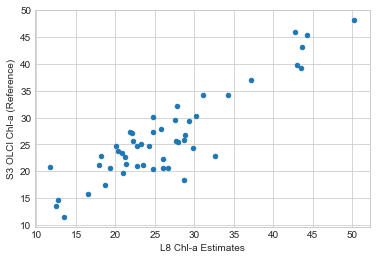

In [16]:
data.plot(kind='scatter', x = "L8 Chl-a Estimates", y="S3 OLCI Chl-a (Reference)")
plt.show()

In [17]:

# change to df
estimates = pd.DataFrame(data["S3 OLCI Chl-a (Reference)"])
reference = pd.DataFrame(data["L8 Chl-a Estimates"])

In [18]:
#Build linear model
lm = linear_model.LinearRegression()
model = lm.fit(estimates, reference)

In [19]:
model.coef_

array([[0.94923336]])

In [20]:
model.intercept_

array([1.30756794])

In [21]:
# Model Evaluation
model.score(estimates, reference)

0.8091838885413737

In [22]:
# Predict new value of price
estimatesNew = 56
estimatesNew = np.array(estimatesNew).reshape(1, -1)
estimatesPred = model.predict(estimatesNew)
estimatesPred

C:\Users\okomo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[54.4646359]])

In [23]:
# Predict more values
X = ([672676, 582682])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df = pd.concat([X, Y], axis = 1, keys = ['estimatesNew', 'estimatesPred'])
df

C:\Users\okomo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,estimatesNew,estimatesPred
,0,0
0,672676,638527.804803
1,582682,553102.498129


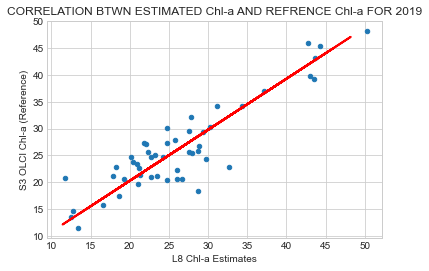

In [24]:
# Visualize the results

#data.plot(kind = "scatter", x = 'L8 Chl-a Estimates', y = "S3 OLCI Chl-a (Reference)")
data.plot(kind = "scatter", x = 'L8 Chl-a Estimates', y = "S3 OLCI Chl-a (Reference)")
# Regression line
plt.plot(estimates, model.predict(estimates), color = "red", linewidth = 2)
#plt.legend(loc='best',fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title("CORRELATION BTWN ESTIMATED Chl-a AND REFRENCE Chl-a FOR 2019")
plt.show()